<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Project for Statistics for Data Science with Python

**JIAQING LI**  
2022-08-11

You can click on the left panel to open "**Table of contents**" for an easy access.

## Overview

**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df.CHAS.unique()

array([0., 1.])

The following describes the dataset variables:

- **CRIM** - per capita crime rate by town

- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS** - proportion of non-retail business acres per town.

- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- **NOX** - nitric oxides concentration (parts per 10 million)

- **RM** - average number of rooms per dwelling

- **AGE** - proportion of owner-occupied units built prior to 1940

- **DIS** - weighted distances to five Boston employment centres

- **RAD** - index of accessibility to radial highways

- **TAX** - full-value property-tax rate per $10,000

- **PTRATIO** - pupil-teacher ratio by town

- **LSTAT** - % lower status of the population

- **MEDV** - Median value of owner-occupied homes in $1000's

## Visualization

### 1. For the "Median value of owner-occupied homes" provide a **boxplot**

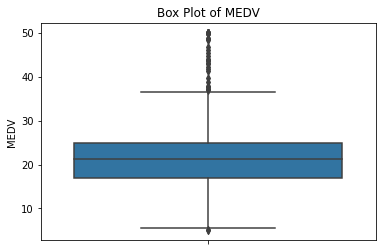

In [60]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Box Plot of MEDV");

There is some outliers.

### 2. Provide a **bar plot** for the Charles river variable

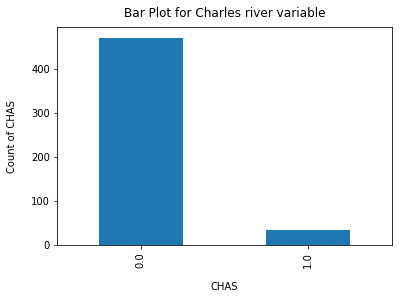

In [62]:
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.xlabel("CHAS", labelpad=14)
plt.ylabel("Count of CHAS", labelpad=14)
plt.title("Bar Plot for Charles river variable", y=1.02);

Numbers of tract bounds river are much smaller than those not.

### 3. Provide a **boxplot** for the **MEDV** variable vs the **AGE** variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [31]:
# discretize age variable, add column
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = 'Younger' # '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Middle' # 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = 'Older' # '70 years and older'

In [32]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Middle
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Middle
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Middle
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Middle


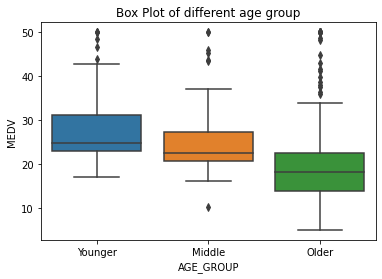

In [59]:
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', order=['Younger', 'Middle', 'Older'], data=boston_df)
plt.title("Box Plot of different age group");

There is a declining trend of median value of owner-occupied homes for increasing age.

### 4. Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town

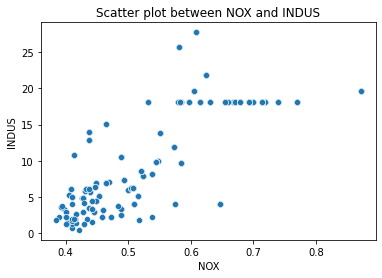

In [58]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Scatter plot between NOX and INDUS");

There is a positive correlation between nitric oxides concentration and proportion of non-retail business acres per town.

### 5. Create a **histogram** for the pupil to teacher ratio variable
- PTRATIO - pupil-teacher ratio by town

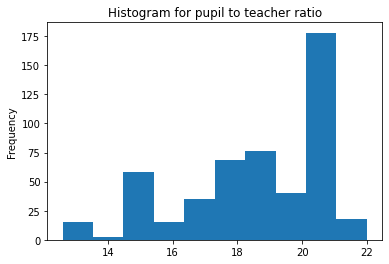

In [61]:
boston_df['PTRATIO'].plot(kind='hist')
plt.title("Histogram for pupil to teacher ratio");

## Hypothesis Analysis

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- $H_0$: no difference in median value of houses bounded by the Charles river
- $H_1$: there is significant difference 
- Use α = 0.05

In [43]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we cannot assume equality of variance

In [44]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion**: Since the p-value is less than 0.05 we reject null hypothesis. So there is a significant difference in median value of houses bounded by the Charles river.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- $H_0$: no difference in Median values of houses (MEDV) for each age group
- $H_1$: at least one of the means differ

In [46]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_GROUP', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_GROUP    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


**Conclusion**: Reject the null hypothesis since the p-value is less than 0.05. There is significant evidence that at least one of the means differ.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Method 1: Pearson Correlation

In [49]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Method 2: Regression analysis


- $H_0$: no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- $H_1$: there is relationship

In [52]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           7.91e-98
Time:                        21:19:03   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: p < 0.05 there is evidence of correlation between **Nitric oxide concentrations (NOX)** and **proportion of non-retail business acres per town (INDUS)**.

### 4. What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)


- $H_0$: no impact of DIS on MEDV
- $H_1$: there is relationship

In [53]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        21:19:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Since p < 0.05 there is evidence of correlation between weighted distance to the five Boston employment centres (DIS) and proportion of non-retail business acres per town (INDUS). The coefficient is **1.0916**.

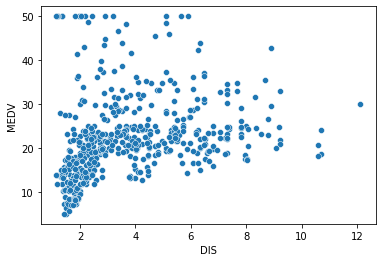

In [54]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)